In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Loading the data
data=pd.read_csv("/content/breast-cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


###Exploratory Analysis of Data

In [ ]:
#checking for missing values
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#check for duplicates
data.duplicated().any()

False

In [ ]:
#Encode the labels
data["diagnosis"] = data["diagnosis"].map({'M': 1, 'B': 0})

In [ ]:
#Outlier Analysis
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [ ]:
lower_limit, upper_limit = outlier_thresholds(data, 'diagnosis')
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -1.5
Upper Limit: 2.5


In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
is_outlier = check_outlier(data, 'diagnosis')
print(is_outlier)

False


In [ ]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

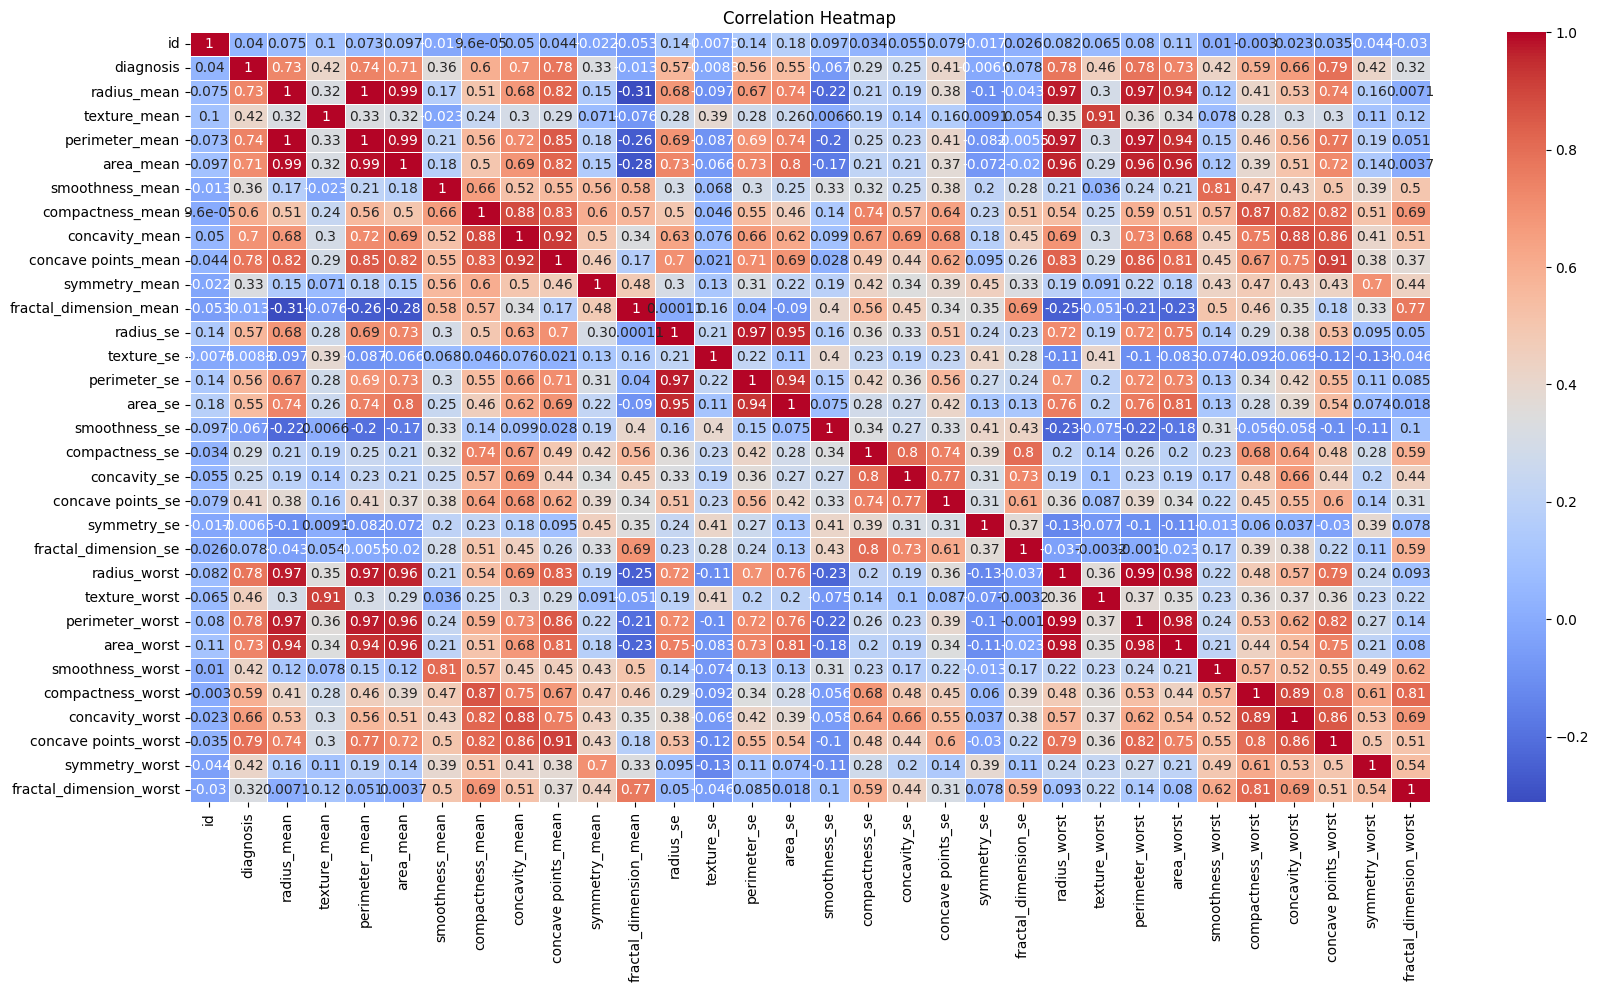

In [ ]:
# Creating a correlation matrix
correlation_matrix = data.corr()
# Creating the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X=data.drop('diagnosis',axis=1) #feature variable
y=data['diagnosis']  #target variable
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


###ANOVA

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
# ANOVA feature selection
anova_selector = SelectKBest(score_func=f_classif, k=15)  # Select top 15 features
X_anova = anova_selector.fit_transform(X, y)
# Get selected feature indices
anova_indices = anova_selector.get_support(indices=True)
# Get selected feature names
anova_features = X.columns[anova_indices]
# Print selected feature names
print("ANOVA selected features:", anova_features)

ANOVA selected features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


###L1 Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
# Perform feature selection using L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, y)
selected_features = list(X.columns[model.coef_[0] != 0])
print("Selected Features:")
print(selected_features)

Selected Features:
['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'texture_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst']


### Chi-Square Test

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.feature_selection import RFE as RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#spliting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
f_score = chi2(X_train,y_train)
chisquare = pd.DataFrame(f_score).T.set_index(X_train.columns).rename(columns={0:'ChiSquare',1:'ChiSqr_pValue'})
chi2_list = chisquare.sort_values(by='ChiSquare',ascending=False)
chi2_list

,ChiSquare,ChiSqr_pValue
id,1.564484e+07,0.000000e+00
area_worst,8.566726e+04,0.000000e+00
area_mean,4.042326e+04,0.000000e+00
area_se,6.783418e+03,0.000000e+00
perimeter_worst,2.734503e+03,0.000000e+00
perimeter_mean,1.477894e+03,0.000000e+00
radius_worst,3.685248e+02,3.920882e-82
radius_mean,1.964624e+02,1.235498e-44
perimeter_se,1.878622e+02,9.310573e-43
texture_worst,1.201481e+02,5.871028e-28


###RFE

In [ ]:
model = RFE(RandomForestClassifier(n_estimators=10,random_state=10), n_features_to_select=8,step=2)
model.fit(X_train,y_train)
X_train.columns[(model.get_support())]

Index(['radius_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

PCA

In [ ]:
def create_pca_df(dataframe, target, id_label="id", n_components=2):
    y = dataframe[target]
    X = dataframe.drop([target, id_label], axis=1)
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_df = create_pca_df(data, "diagnosis")

In [ ]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

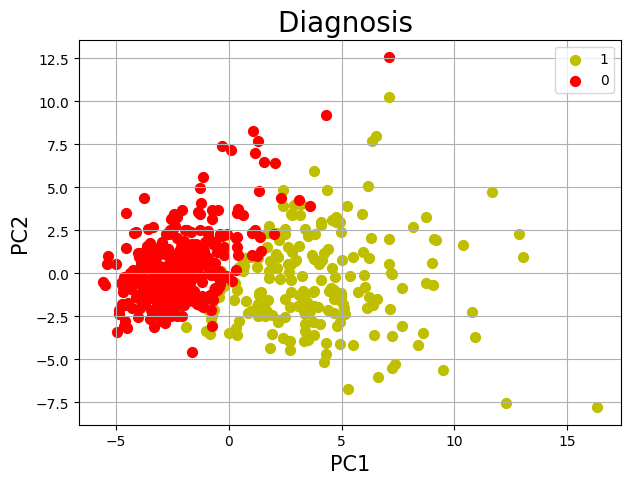

In [ ]:
import random
plot_pca(pca_df, "diagnosis")

### Model Training

In [ ]:
cols=['concavity_worst', 'perimeter_worst', 'radius_worst', 'area_se', 'radius_mean','area_worst', 'perimeter_mean', 'area_mean','compactness_worst','perimeter_se']
X=data[cols]
y=data['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(X_train, y_train)
y_preds_dt = decision_tree.predict(X_test)
y_preds_dt

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

acc_dt= accuracy_score(y_test,y_preds_dt)*100
print('Accuracy of the model: {0}%'.format(acc_dt))

Accuracy of the model: 87.71929824561403%


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_preds_dt)
precision_dt = precision_score(y_test, y_preds_dt)
recall_dt = recall_score(y_test, y_preds_dt)
f1_dt = f1_score(y_test, y_preds_dt)
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_preds_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

print("Confusion Matrix:")
cm_dt

Confusion Matrix:


array([[62,  9],
       [ 5, 38]])

In [ ]:
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print("True Positive Rate (TPR):", tpr_dt)
print("False Positive Rate (FPR):", fpr_dt)
print("Area Under the ROC Curve (AUC):", roc_auc_dt)

Precision: 0.8085106382978723
Recall: 0.8837209302325582
F1-Score: 0.8444444444444444
True Positive Rate (TPR): [0.         0.88372093 1.        ]
False Positive Rate (FPR): [0.         0.12676056 1.        ]
Area Under the ROC Curve (AUC): 0.8784801834261382


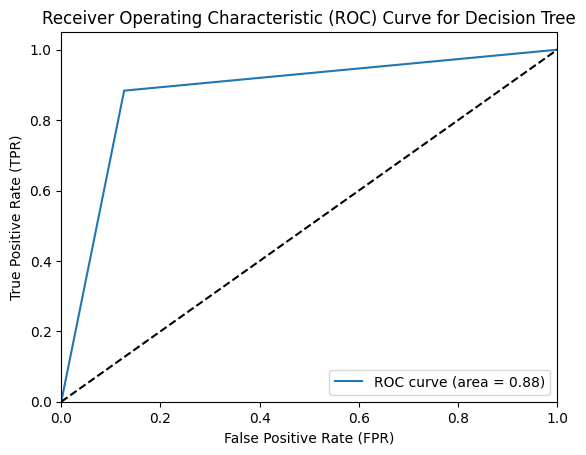

In [ ]:
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds_gnb = gnb.predict(X_test)

In [ ]:
acc_gnb = accuracy_score(y_test,y_preds_gnb)*100
print('Accuracy of the model: {0}%'.format(acc_gnb))

Accuracy of the model: 96.49122807017544%


In [ ]:
cm_gnb = confusion_matrix(y_test, y_preds_gnb)
precision_gnb = precision_score(y_test, y_preds_gnb)
recall_gnb = recall_score(y_test, y_preds_gnb)
f1_gnb = f1_score(y_test, y_preds_gnb)
fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_preds_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

print("Confusion Matrix:")
print(cm_gnb)

Confusion Matrix:
[[71  0]
 [ 4 39]]


In [ ]:
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1-Score:", f1_gnb)
print("True Positive Rate (TPR):", tpr_gnb)
print("False Positive Rate (FPR):", fpr_gnb)
print("Area Under the ROC Curve (AUC):", roc_auc_gnb)

Precision: 1.0
Recall: 0.9069767441860465
F1-Score: 0.951219512195122
True Positive Rate (TPR): [0.         0.90697674 1.        ]
False Positive Rate (FPR): [0. 0. 1.]
Area Under the ROC Curve (AUC): 0.9534883720930232


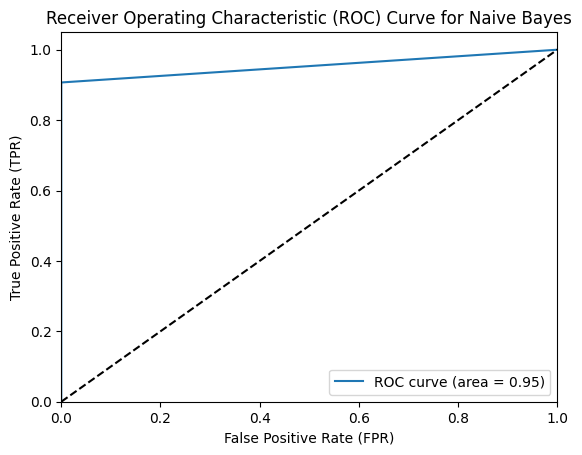

In [ ]:
plt.figure()
plt.plot(fpr_gnb, tpr_gnb, label='ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(X_train, y_train)
y_preds_knn = KNN.predict(X_test)
y_preds_knn

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
acc_KNN = accuracy_score(y_test,y_preds_knn)*100
print('Accuracy of the model: {0}%'.format(acc_KNN))

Accuracy of the model: 94.73684210526315%


In [ ]:
cm_knn = confusion_matrix(y_test, y_preds_knn)
precision_knn = precision_score(y_test,y_preds_knn)
recall_knn = recall_score(y_test,y_preds_knn)
f1_knn = f1_score(y_test,y_preds_knn)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test,y_preds_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

print("Confusion Matrix:")
cm_knn

Confusion Matrix:


array([[70,  1],
       [ 5, 38]])

In [ ]:
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-Score:", f1_knn)
print("True Positive Rate (TPR):", tpr_knn)
print("False Positive Rate (FPR):", fpr_knn)
print("Area Under the ROC Curve (AUC):", roc_auc_knn)

Precision: 0.9743589743589743
Recall: 0.8837209302325582
F1-Score: 0.9268292682926831
True Positive Rate (TPR): [0.         0.88372093 1.        ]
False Positive Rate (FPR): [0.         0.01408451 1.        ]
Area Under the ROC Curve (AUC): 0.9348182115951523


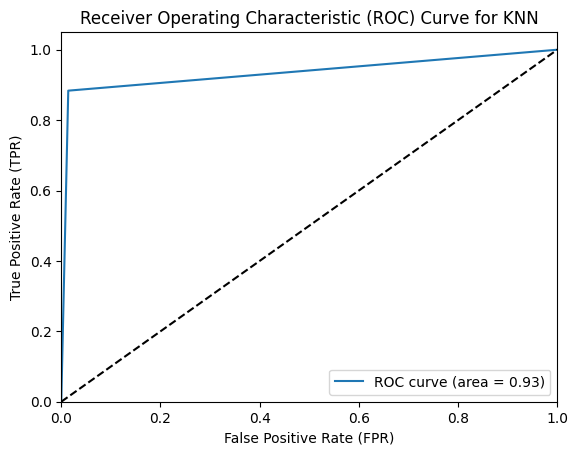

In [ ]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [ ]:
random_forest.fit(X_train, y_train)
y_preds_rf = random_forest.predict(X_test)
y_preds_rf

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
acc_rf = accuracy_score(y_test,y_preds_rf)*100
print('Accuracy of the model: {0}%'.format(acc_rf))

Accuracy of the model: 96.49122807017544%


In [ ]:
cm_rf = confusion_matrix(y_test, y_preds_rf)
precision_rf = precision_score(y_test,y_preds_rf)
recall_rf = recall_score(y_test,y_preds_rf)
f1_rf = f1_score(y_test,y_preds_rf)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test,y_preds_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print("Confusion Matrix:")
cm_knn

Confusion Matrix:


array([[70,  1],
       [ 5, 38]])

In [ ]:
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)
print("True Positive Rate (TPR):", tpr_rf)
print("False Positive Rate (FPR):", fpr_rf)
print("Area Under the ROC Curve (AUC):", roc_auc_rf)

Precision: 0.975609756097561
Recall: 0.9302325581395349
F1-Score: 0.9523809523809524
True Positive Rate (TPR): [0.         0.93023256 1.        ]
False Positive Rate (FPR): [0.         0.01408451 1.        ]
Area Under the ROC Curve (AUC): 0.9580740255486406


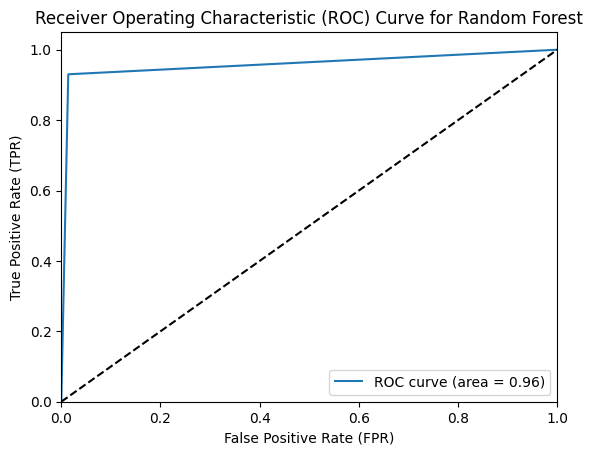

In [ ]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [ ]:
Models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Naive Bayes', 'KNeighbour Clasifier',
              'Decision Tree'],
    'Accuracy' : [acc_rf, acc_gnb, acc_KNN, acc_dt],
    'Precision' :[precision_rf*100,precision_gnb*100,precision_knn*100,precision_dt*100],
    'Recall' : [recall_rf*100,recall_gnb*100,recall_knn*100,recall_dt*100],
    'F1-Score': [f1_rf*100,f1_gnb*100,f1_knn*100,f1_dt*100]
})
Models

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest Classifier,96.491228,97.560976,93.023256,95.238095
1,Naive Bayes,96.491228,100.000000,90.697674,95.121951
2,KNeighbour Clasifier,94.736842,97.435897,88.372093,92.682927
3,Decision Tree,87.719298,80.851064,88.372093,84.444444


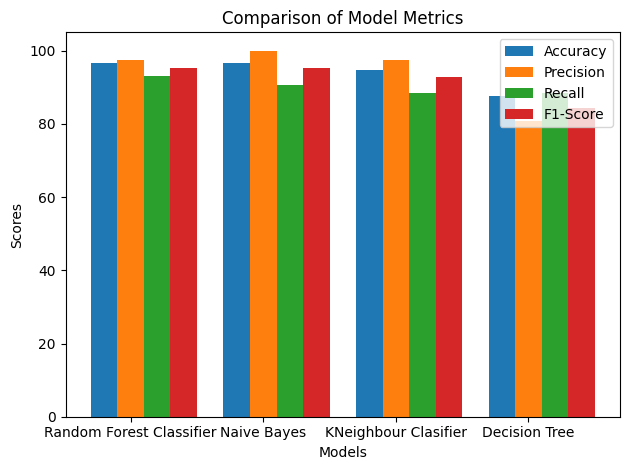

In [ ]:
models = Models['Model']
accuracy = [acc_rf, acc_gnb, acc_KNN, acc_dt]
precision = [precision_rf*100,precision_gnb*100,precision_knn*100,precision_dt*100]
recall = [recall_rf*100,recall_gnb*100,recall_knn*100,recall_dt*100]
f1_score = [f1_rf*100,f1_gnb*100,f1_knn*100,f1_dt*100]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + (2 * width), f1_score, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()